## Data Mining ELA 5 - BY SHREYA RAJPAL 21BBS0202

### QUESTIONS 
1. Consider the TATA MOTORS shares data from National stock exchange for the past 7
years. Implement the AutoRegressive Integrated Moving Average (ARIMA) model on the
data and identify the 50 days moving average(MA), 200 days MA, 365 days MA and 500
days MA. Summarize the autocorrelations detected from the model.


C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but i

ARIMA Summary for Original Price:

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1668
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5980.564
Date:                Sun, 17 Nov 2024   AIC                          11973.128
Time:                        21:39:44   BIC                          12005.641
Sample:                             0   HQIC                         11985.176
                               - 1668                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0116      0.018     -0.643      0.520      -0.047       0.024
ar.L2          0.0307      0.019      1.592      0.111      -0.007       0.068
ar.L3         -0.

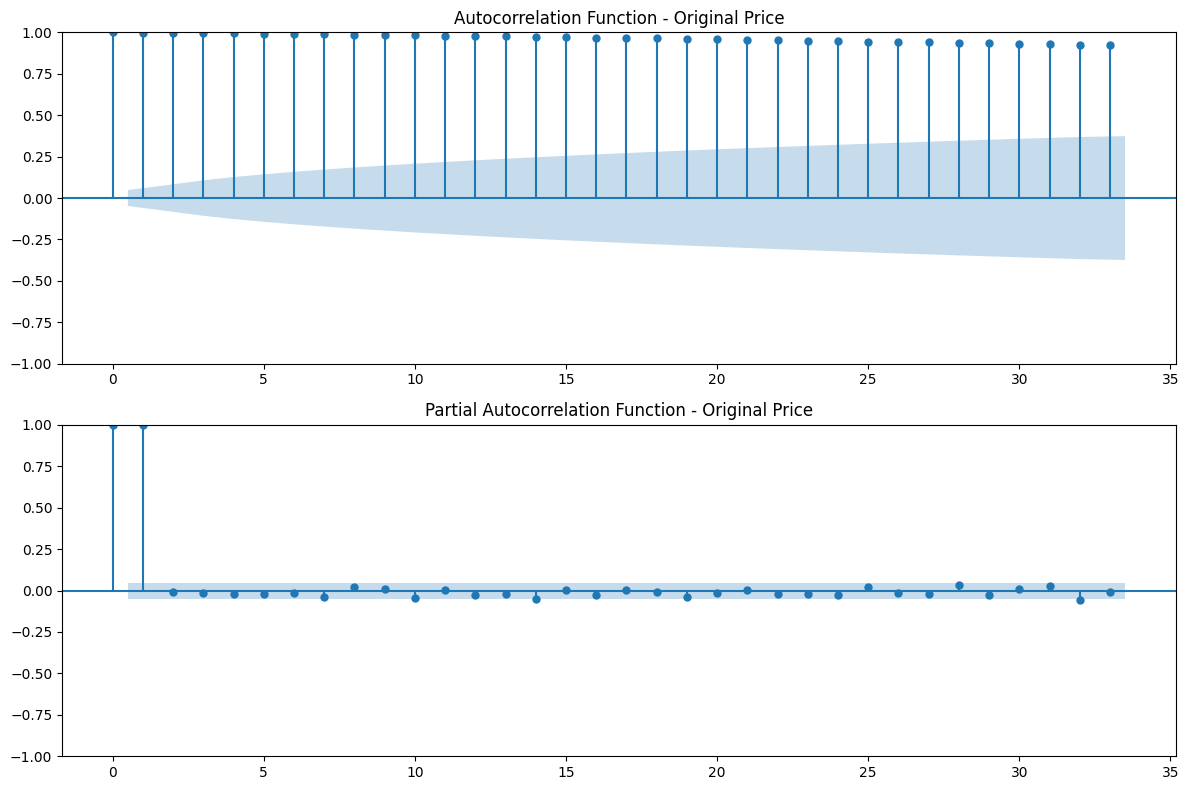

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
file_path = 'TAMO Historical Data.csv'
data = pd.read_csv(file_path)

# Preprocessing
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data = data.sort_values(by='Date')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data = data.dropna(subset=['Price'])
data.set_index('Date', inplace=True)

# Calculate moving averages
data['50_Days_MA'] = data['Price'].rolling(window=50).mean()
data['200_Days_MA'] = data['Price'].rolling(window=200).mean()
data['365_Days_MA'] = data['Price'].rolling(window=365).mean()
data['500_Days_MA'] = data['Price'].rolling(window=500).mean()

# Function to fit ARIMA model
def fit_arima(series, order):
    model = ARIMA(series.dropna(), order=order)
    return model.fit()

# Define ARIMA order
order = (5, 1, 0)

# Fit ARIMA models
results = {
    'Original Price': fit_arima(data['Price'], order),
    '50 Days MA': fit_arima(data['50_Days_MA'], order),
    '200 Days MA': fit_arima(data['200_Days_MA'], order),
    '365 Days MA': fit_arima(data['365_Days_MA'], order),
    '500 Days MA': fit_arima(data['500_Days_MA'], order),
}

# Print summaries for all ARIMA models
for name, result in results.items():
    print(f"ARIMA Summary for {name}:\n")
    print(result.summary())
    print("\n" + "="*80 + "\n")

# Plot ACF and PACF for the original price
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(data['Price'].dropna(), ax=ax[0])
ax[0].set_title('Autocorrelation Function - Original Price')

plot_pacf(data['Price'].dropna(), ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function - Original Price')

plt.tight_layout()
plt.show()


### QUESTIONS 

2. Implement the Logistic regression for predicting the Possibility of enrolling into a university.
The dataset can determine the probability of a student getting accepted to a particular university
or a degree course in a college by studying the relationship between the estimator variables,
such as
CGPA,
GRE, GMAT, or TOEFL scores,
Research articles (conferences, journals published)
Mini project experience
Internship completed

Accuracy: 0.62

Confusion Matrix:
 [[ 0 15]
 [ 0 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.62      1.00      0.77        25

    accuracy                           0.62        40
   macro avg       0.31      0.50      0.38        40
weighted avg       0.39      0.62      0.48        40

ROC AUC Score: 0.48


C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

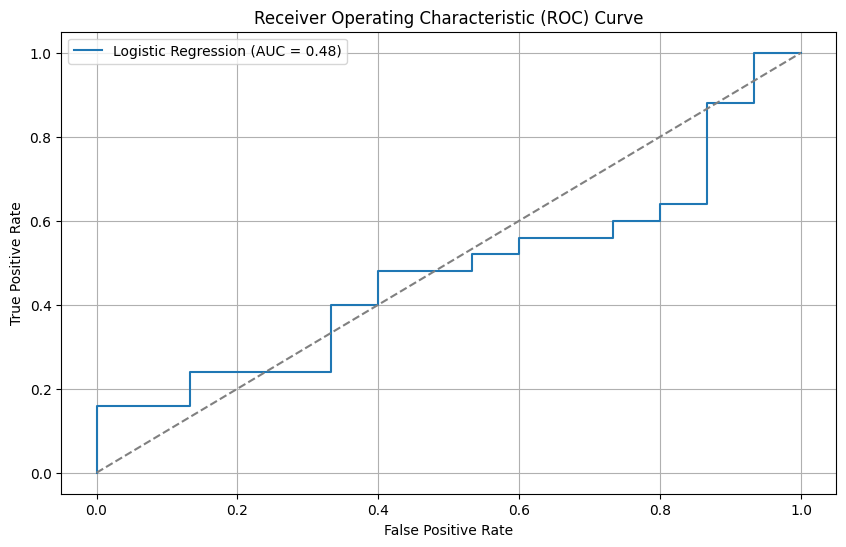

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Example synthetic dataset creation
data = {
    'CGPA': np.random.uniform(6, 10, 200),
    'GRE': np.random.randint(290, 340, 200),
    'GMAT': np.random.randint(400, 800, 200),
    'TOEFL': np.random.randint(80, 120, 200),
    'Conference_Published': np.random.randint(0, 3, 200),  # Conference articles
    'Journal_Published': np.random.randint(0, 3, 200),     # Journal articles
    'Mini_Projects': np.random.randint(0, 3, 200),
    'Internships': np.random.randint(0, 3, 200),
    'Admitted': np.random.choice([0, 1], 200, p=[0.4, 0.6])  # 0 for not admitted, 1 for admitted
}

# Create DataFrame
df = pd.DataFrame(data)

# Combine conference and journal publications into total research articles (optional, for reference)
df['Research_Articles'] = df['Conference_Published'] + df['Journal_Published']

# Separate features and target variable
X = df.drop(['Admitted', 'Research_Articles'], axis=1)  # Exclude combined research articles
y = df['Admitted']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


## Here we set a relationship and compute 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
np.random.seed(42)

# Number of samples
n_students = 1000

# Define the dataset
data = {
    "CGPA": np.random.uniform(6.0, 10.0, n_students),
    "GRE": np.random.randint(290, 340, n_students),
    "GMAT": np.random.randint(500, 800, n_students),
    "TOEFL": np.random.randint(80, 120, n_students),
    "Conference_Published": np.random.randint(0, 3, n_students),  # New Feature
    "Journal_Published": np.random.randint(0, 3, n_students),  # New Feature
    "Mini_Projects": np.random.randint(0, 6, n_students),
    "Internships": np.random.randint(0, 3, n_students),
}

# Create DataFrame
df = pd.DataFrame(data)

# Combine conference and journal publications into total research articles
df['Research_Articles'] = df['Conference_Published'] + df['Journal_Published']

# Check distribution of target variable before relaxing criteria
print("Target Variable Distribution Before Relaxing Criteria:")
df['Accepted'] = (
    (df['CGPA'] > 8.5) &  # CGPA threshold
    (df['GRE'] > 320) &  # GRE threshold
    (df['GMAT'] > 700) &  # GMAT threshold
    (df['TOEFL'] > 100) &  # TOEFL threshold
    (df['Research_Articles'] >= 2) &  # Total research articles
    (df['Mini_Projects'] >= 5) &  # Mini projects threshold
    (df['Internships'] >= 2)  # Internship threshold
).astype(int)
print(df['Accepted'].value_counts())

# Relax criteria for generating 'Accepted'
df['Accepted'] = (
    (df['CGPA'] > 7.5) &  # Reduced CGPA threshold
    (df['GRE'] > 310) &  # Reduced GRE threshold
    (df['GMAT'] > 650) &  # Reduced GMAT threshold
    (df['TOEFL'] > 90) &  # Reduced TOEFL threshold
    (df['Research_Articles'] >= 1) &  # Reduced research articles threshold
    (df['Mini_Projects'] >= 3) &  # Reduced mini projects threshold
    (df['Internships'] >= 1)  # Reduced internships threshold
).astype(int)

# Check class distribution again
print("Target Variable Distribution After Relaxing Criteria:")
print(df['Accepted'].value_counts())

# Save the dataset
df.to_csv("university_admission_data_with_publications.csv", index=False)
print("Synthetic dataset saved to 'university_admission_data_with_publications.csv'.")

# Prepare data for Logistic Regression
X = df.drop(columns=["Accepted", "Research_Articles"])  # Exclude Research_Articles as it's redundant
y = df["Accepted"]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Target Variable Distribution Before Relaxing Criteria:
Accepted
0    1000
Name: count, dtype: int64
Target Variable Distribution After Relaxing Criteria:
Accepted
0    964
1     36
Name: count, dtype: int64
Synthetic dataset saved to 'university_admission_data_with_publications.csv'.
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       191
           1       0.75      0.33      0.46         9

    accuracy                           0.96       200
   macro avg       0.86      0.66      0.72       200
weighted avg       0.96      0.96      0.96       200

Accuracy Score: 0.965
